In [1]:
from numpy.random import choice
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def _select_prices(n_iter):
    """
        Randomly select price position.
        
        Parameters :
            n_iter : int
                Number of games to simulate
        Return:
            Numpy array of size n_iter
    """
    prices = choice([0, 1, 2], replace=True, size=n_iter)
    return prices


def _select_row(row):
    """
        Select row element according to blacklist elements (in columns 3 and 4)
        
        Parameter:
            row : np.ndarray row
                Row for which function is applied
        Return :
            Selected element(int)
    """
    curtains = row[:3]
    price = row[3]
    first_choice = row[4]
    reveal = curtains[[c not in [price, first_choice] for c in curtains]]
    
    if len(reveal) > 1 :
        reveal = choice(reveal, size=1)
    
    return reveal[0]


def simulate_games(n_iter):
    """
    """
    
    curtains = np.array([(0, 1, 2) for i in range(n_iter)])
    prices = _select_prices(n_iter)
    first_choices = _select_prices(n_iter)
    
    data = np.c_[curtains, prices, first_choices]
    reveals = np.apply_along_axis(_select_row, axis=1, arr=data)
    
    data = np.c_[curtains, reveals, first_choices]
    second_choices = np.apply_along_axis(_select_row, axis=1, arr=data)
    
    keeper_score = (first_choices == prices).sum() 
    changer_score = (second_choices == prices).sum() 
    
    return keeper_score / n_iter, changer_score / n_iter
         

In [3]:
res = simulate_games(1000)

Text(0.5, 1.0, 'Résultat des deux stratégie au Monty Hall')

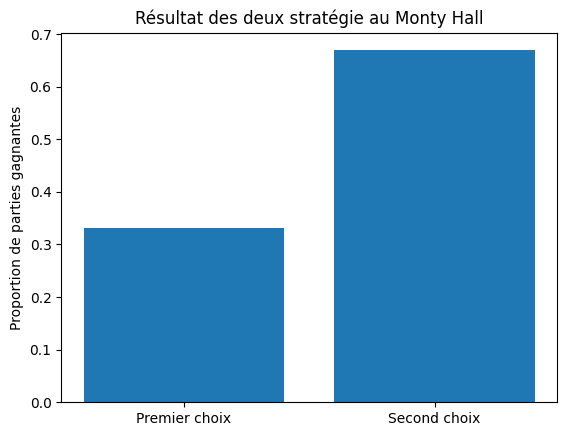

In [4]:
plt.bar(['Premier choix', 'Second choix'], res)
plt.ylabel("Proportion de parties gagnantes")
plt.title('Résultat des deux stratégie au Monty Hall')